In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X = pd.read_csv('Training Data/Linear_X_Train.csv').values
Y = pd.read_csv('Training Data/Linear_Y_Train.csv').values

In [3]:
X

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

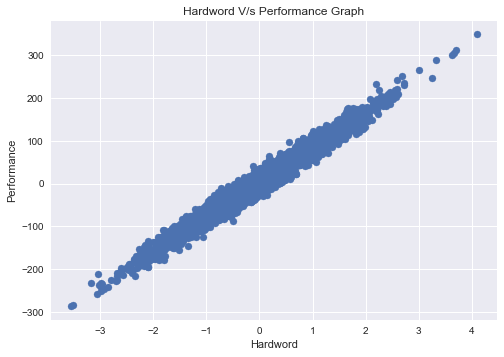

In [4]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title("Hardword V/s Performance Graph")
plt.xlabel("Hardword")
plt.ylabel("Performance")
plt.show()

# Step 2 - Applying Linear Regression

In [5]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_- y)
        grad[1] += (y_ - y)*X[i]
    
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate = 0.1):
    theta = np.zeros((2,))
    theta_list = []
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list

In [6]:
theta,error_list,theta_list = gradientDescent(X,Y)
theta_list

[(0.06838689680155917, 7.924704747723734),
 (0.1598862574084276, 15.068568308475694),
 (0.2692356725913279, 21.508641757914805),
 (0.39199018597757235, 27.31436173234825),
 (0.5244117702494848, 32.548304036566876),
 (0.663372703958301, 37.26686255449585),
 (0.8062711765765085, 41.520860877736276),
 (0.9509576446743404, 45.356103329884554),
 (1.095670635056387, 48.81387140072683),
 (1.2389808438407912, 51.93137100669648),
 (1.3797425160362924, 54.74213545576511),
 (1.5170512101537348, 57.27638851028255),
 (1.6502071585401494, 59.561371504848935),
 (1.7786835280103575, 61.621638083288765),
 (1.9020989683638332, 63.47931976487526),
 (2.0201939097484436, 65.15436523122995),
 (2.1328101346645543, 66.6647559382917),
 (2.2398732076668653, 68.02670039925427),
 (2.341377396381857, 69.25480925157204),
 (2.4373727620833145, 70.36225301147103),
 (2.527954137438135, 71.36090423057317),
 (2.6132517437537084, 72.26146559917451),
 (2.6934232306625674, 73.07358538754369),
 (2.768646948145051, 73.805961

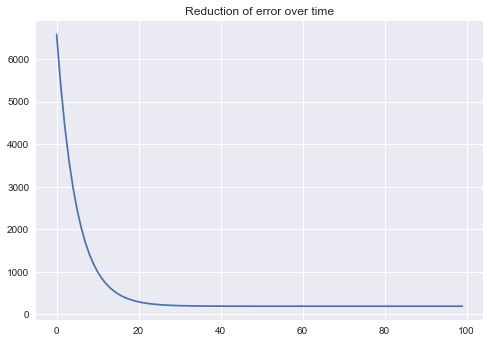

In [7]:
plt.plot(error_list)
plt.title("Reduction of error over time")
plt.show()

# Step - 3 Predictions and Best Line 

In [8]:
y_= hypothesis(X,theta)

In [9]:
y_

array([[-19.57419108],
       [-43.69635897],
       [ 86.48322254],
       ...,
       [-20.85126634],
       [138.69991375],
       [-35.87967507]])

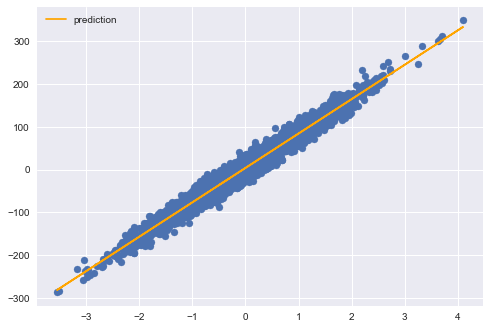

In [10]:
plt.scatter(X,Y)
plt.plot(X,y_,color='orange',label = "prediction")
plt.legend()
plt.show()

In [11]:
x_test = pd.read_csv('Test Cases/Linear_X_Test.csv')

In [12]:
y_ =  hypothesis(x_test.values,theta)

In [13]:
y_

array([[-147.52439132],
       [ -66.26570453],
       [-200.05620583],
       ...,
       [  14.03673979],
       [ -18.66650943],
       [ -51.07517461]])

In [14]:
pd.DataFrame(y_).to_csv('Y_Test.csv',header = ["y"],index=False)

# R2 Scoring Method

In [15]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = 1 - (num/denom) 
    return score*100

In [16]:
y_ = hypothesis(X,theta)
r2_score(Y,y_)

97.09612220841039

# Section - 5 Visualising Loss Function,Gradient Descent, Theta Updates

In [17]:
theta

array([ 3.72687896, 80.54086647])

In [18]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]

print(J)

[[3589.28096951 3505.88965864 3424.49834777 ... 3020.15003249
  3090.75872162 3163.36741075]
 [3513.64821294 3430.18131275 3348.71441255 ... 2938.69689802
  3009.22999782 3081.76309763]
 [3439.98675922 3356.4442697  3274.90178018 ... 2859.21506639
  2929.67257688 3002.13008736]
 ...
 [3533.59085392 3444.37916515 3357.16747638 ... 2516.29081869
  2581.07912992 2647.86744115]
 [3609.74841683 3520.46113874 3433.17386065 ... 2586.62800371
  2651.34072562 2718.05344752]
 [3687.8772826  3598.51441518 3511.15154777 ... 2658.93649158
  2723.57362416 2790.21075674]]


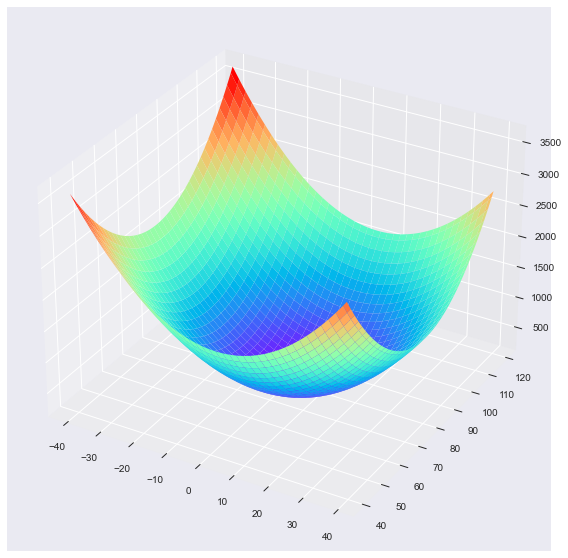

In [19]:
fig = plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.plot_surface(T0,T1,J,cmap="rainbow")
plt.show()

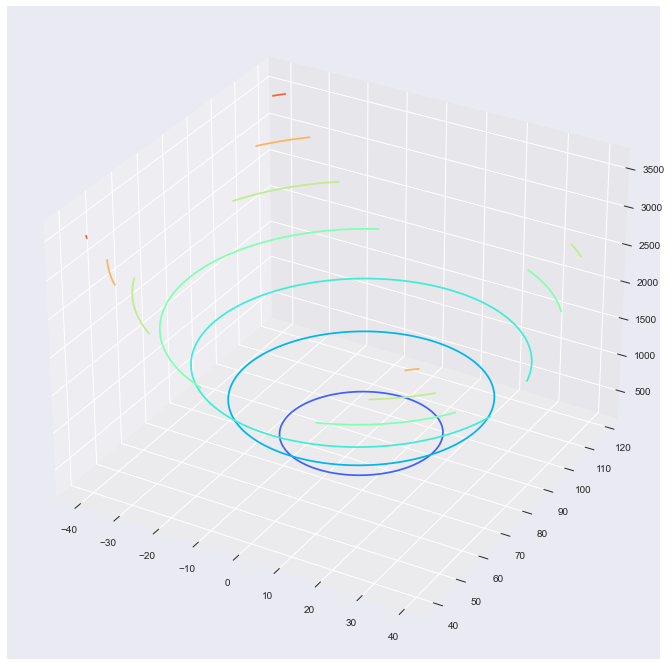

In [20]:
fig = plt.figure(figsize=(12,12))
axes = plt.axes(projection='3d')
axes.contour(T0,T1,J,cmap = "rainbow")
plt.show()

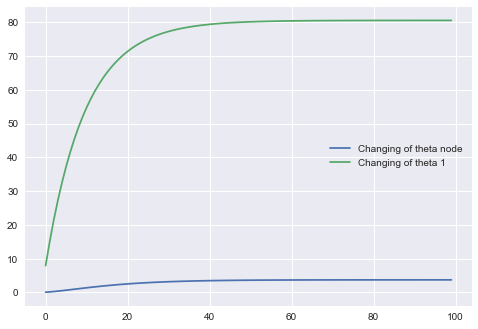

In [21]:
theta_list  = np.array(theta_list)
plt.plot(theta_list[:,0],label = "Changing of theta node")
plt.plot(theta_list[:,1],label = "Changing of theta 1")
plt.legend()
plt.show()

## <font color="green">Trajectory traced by theta updates in the loss function</font>

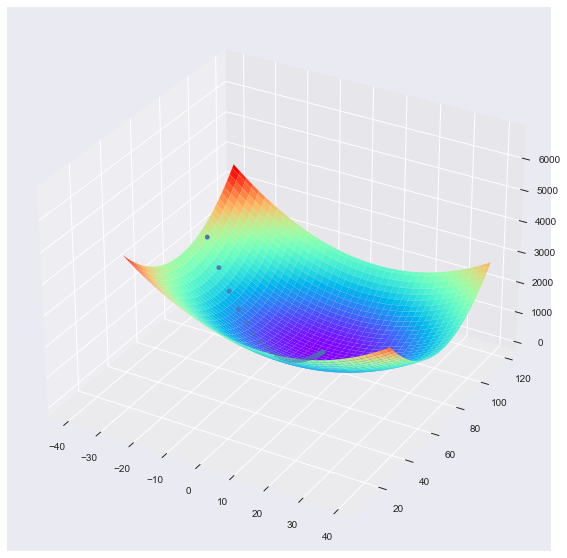

In [22]:
fig = plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

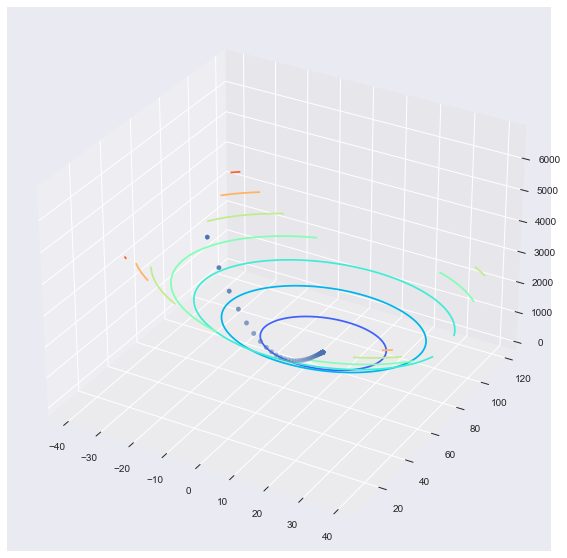

In [23]:
fig = plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

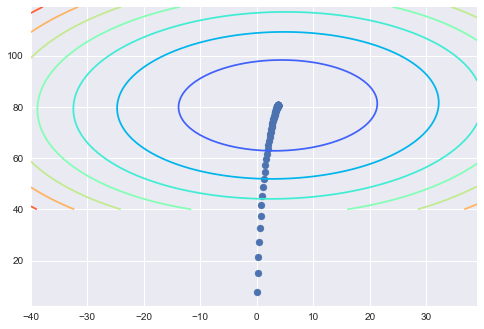

In [24]:
# 2D Contour Plot
plt.contour(T0,T1,J,cmap = "rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [25]:
np.save("ThetaList.npy",theta_list)